## Unicorn companies
a visualisation project.

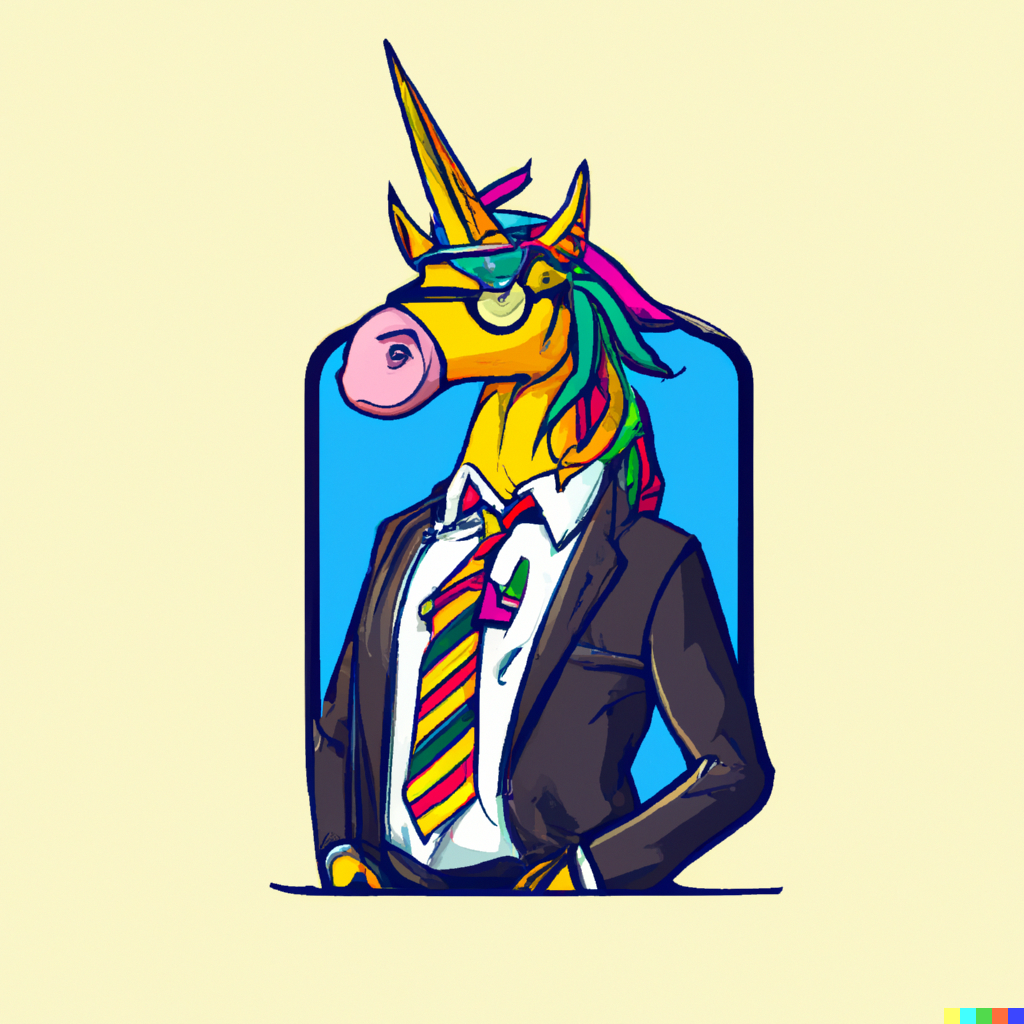

A unicorn company is a privately held business that has a valuation exceeding 1 billion dollars (USD). With a total of 1200 unicorn companies worldwide as of 17 February, these entities are extremely rare, accounting for less than 0.0005% of all existing companies. The name "Unicorn company" is derived from the rarity of such businesses, which are highly sought after by investors due to their high valuation and potential for significant growth.

The emergence of unicorn companies has had a profound impact on the global economy and has forced society to rethink how it perceives business success. These entities have disrupted traditional business models and challenged conventional wisdom on what industries are worth investing in. Aspiring entrepreneurs seeking to establish their own unicorn companies have been compelled to study the blueprint of successful unicorns and draw inspiration from their innovative approaches to doing business.

In this project, data from mavenanalytics.io on unicorn companies will be utilized to gain insights into the world's most successful and influential businesses. The project aims to simplify complex information and provide an accessible, easy-to-understand visualization of unicorn companies and their impact on the global economy. Through this exploration, we hope to gain a deeper understanding of the unique characteristics that define a unicorn company and the factors that contribute to their success.

A microsoft PowerBI dashboard will accompany this notebook for more a more engaging interaction with the dataset.

index.
1 Basic EDA
2 data engineering
3 visualisation

The first phase of the project would be explore the data. This data is sourced by a third party making it prone to errors in entry of the data, consistency of the data and most importantly, the acuracy of the data. So an Exploratory Data Analysis would prove beneficial. 

In [1]:
#to import the data
import pandas as pd
#for plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import nltk
from nltk.corpus import stopwords
#filter warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data
unicorn_companies=pd.read_csv('Unicorn_Companies.csv')

In [3]:
#A simple code to analyse the dataset

def EDA(data):
    from IPython.display import display
    display(data.head())
    # Check for missing values
    if data.isnull().values.any():
        # Find the number of missing values for each column
        missing_counts = data.isnull().sum()
        # Select only the columns with missing values
        missing_columns = missing_counts[missing_counts > 0]
        print(f"Missing values found in columns: {missing_columns}")
    else:
        print("No missing values found")
        
    # Check data types
    data_types = data.dtypes
    print(f"Data types: {data_types}")


In [4]:
EDA(unicorn_companies)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


Missing values found in columns: City                16
Select Investors     1
dtype: int64
Data types: Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object


From the above it becomes aparent that a few changes will need to be implemented into the dataset. namely changing the Date Joined, Year Founded, Valuation and Select Investors column names. Having the evaluation and funding column adusted and lastly having Select Investors column separated would prove more beneficial. 

In [5]:
#to make changes to the column names
unicorn_companies.rename(columns = {'Date Joined' : 'Date_Joined'}, inplace = True)
unicorn_companies.rename(columns = {'Valuation ($B)' : 'Valuation'}, inplace = True)
unicorn_companies.rename(columns = {'Select Investors' : 'Select_Investors'}, inplace = True)
unicorn_companies.rename(columns= {'Year Founded': 'year_founded'}, inplace= True)

Moving on to make adjustments to the Valuation and Funding columns 

In [6]:
# Removing "$", "B", "M" and "Unknown" from Funding column
unicorn_companies.Funding = unicorn_companies.Funding.str.replace("$","")
unicorn_companies.Funding = unicorn_companies.Funding.str.replace("B",'0'*9)
unicorn_companies.Funding = unicorn_companies.Funding.str.replace("M",'0'*6)

# Removing "$" and "B" from Valuation column
unicorn_companies.Valuation = unicorn_companies.Valuation.str.replace("$","")
unicorn_companies.Valuation = unicorn_companies.Valuation.str.replace("B",'0'*9)

And for the final part, Exploding the investor column

In [7]:
#firsly split and convert the names into a list
unicorn_companies["Select_Investors"] = unicorn_companies["Select_Investors"].str.split(", ")

In [8]:
unicorn_companies = unicorn_companies.explode("Select_Investors")
unicorn_companies.head()

,Company,Valuation,Date_Joined,Industry,City,Country,Continent,year_founded,Funding,Select_Investors
0,Bytedance,180000000000,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8000000000,Sequoia Capital China
0,Bytedance,180000000000,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8000000000,SIG Asia Investments
0,Bytedance,180000000000,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8000000000,Sina Weibo
0,Bytedance,180000000000,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8000000000,Softbank Group
1,SpaceX,100000000000,2012-12-01,Other,Hawthorne,United States,North America,2002,7000000000,Founders Fund


Now we can progress into the next phase of this project, it is important to note that a Microsoft Power BI dashboard will be included to enhance the overall experience. However, for the purpose of this notebook, we will solely be utilizing Python visuals.

This is done so as to ensure that the project remains accessible to all users, regardless of their technical knowledge or access to specialized software. Despite not incorporating the added functionalities of Power BI, Python's powerful visualization tools will be utilized to create a clear and concise representation of the data.

It is with the hope that this decision to utilize Python visuals will not only enable the data to be more easily digestible for the reader but also serve as a testament to the versatility of the python itself. By showcasing the capabilities of Python's visualization tools, we aim to demonstrate the immense potential of this popular programming language and its relevance in modern-day data analysis.

## Visualisation of relationships. 

There are always basics when it comes to visualisation tools. Namely, Scatterplot, boxplot, piecharts and so forth. these visualisation tools are commonly used in the world of data analytics because they are powerful tools, easy to construct and easy for the readers to interpret. With this said, the aim of this project is to take it a step further than the common basic visuals. let us explore what is possible with python.

In [10]:
unicorn_companies_sorted = unicorn_companies.sort_values('Valuation')

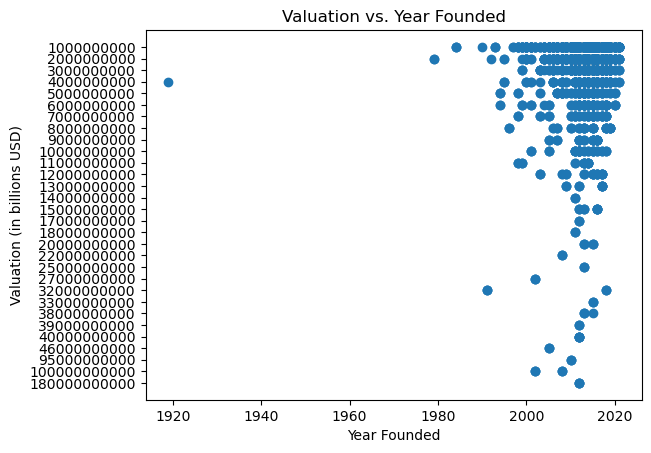

In [11]:
import matplotlib.pyplot as plt

plt.scatter(unicorn_companies['year_founded'], unicorn_companies['Valuation'])
plt.xlabel('Year Founded')
plt.ylabel('Valuation (in billions USD)')
plt.title('Valuation vs. Year Founded')
plt.show()
